In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

In [112]:
# read the two files given
train_table = pd.read_csv('MNIST_training.csv')
test_table = pd.read_csv('MNIST_test.csv')

In [113]:
#conver the table above to numpy arrays
train_data = train_table.values
test_data = test_table.values

In [119]:
def knn(k, train_data, test_data):
    #a list where predicted labels are stored
    labels = []
    
    for test in test_data:
        #calculate the cosine similarity by a test data and train data
        cosine = np.sum(test*train_data, axis=1)/(np.linalg.norm(test, ord=2)*np.linalg.norm(train_data, ord=2, axis=1))
        
        #sort the distances and save the indeces
        sorted_train_indexes = np.argsort(cosine)[::-1]
        
        #save labels of the closest train data until k 
        sorted_k_labels = train_data[sorted_train_indexes, 0][:k]
        
        #find the most common label
        label = Counter(sorted_k_labels).most_common(1)[0][0]
        
        #save the label in the labels list
        labels.append(label)
        
    return labels

#max size of k until which accuracy is calculated
max_k = 40

#list where amounts of accuracy are saved
acc_list = []

for i in range(1, max_k):
    #with k size, train data, test data, predict the closest label
    pred_labels = knn(i, train_data, test_data)
    
    #calculate the accuracy
    accuracy = np.sum(pred_labels == test_data[:, 0]) / len(test_data)
    
    #save the accuracy in acc_list
    acc_list.append(accuracy)
    
    print("When k size is {}, ".format(i), "accuracy is", accuracy)

When k size is 1,  accuracy is 0.84
When k size is 2,  accuracy is 0.84
When k size is 3,  accuracy is 0.86
When k size is 4,  accuracy is 0.86
When k size is 5,  accuracy is 0.88
When k size is 6,  accuracy is 0.9
When k size is 7,  accuracy is 0.88
When k size is 8,  accuracy is 0.9
When k size is 9,  accuracy is 0.9
When k size is 10,  accuracy is 0.88
When k size is 11,  accuracy is 0.86
When k size is 12,  accuracy is 0.9
When k size is 13,  accuracy is 0.88
When k size is 14,  accuracy is 0.88
When k size is 15,  accuracy is 0.88
When k size is 16,  accuracy is 0.88
When k size is 17,  accuracy is 0.86
When k size is 18,  accuracy is 0.84
When k size is 19,  accuracy is 0.84
When k size is 20,  accuracy is 0.84
When k size is 21,  accuracy is 0.84
When k size is 22,  accuracy is 0.84
When k size is 23,  accuracy is 0.84
When k size is 24,  accuracy is 0.84
When k size is 25,  accuracy is 0.84
When k size is 26,  accuracy is 0.82
When k size is 27,  accuracy is 0.84
When k size is

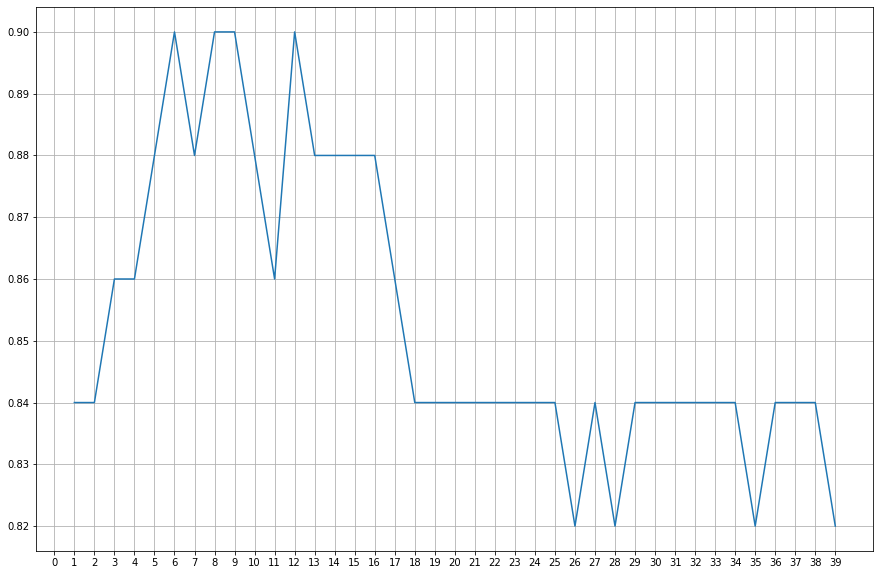

In [120]:
#plot the result in a graph
figure(figsize=(15,10))
plt.plot(np.arange(1, max_k), acc_list)
plt.xticks(np.arange(max_k))
plt.grid()
plt.show()

In [121]:
#save the k size and the accuracy in a list
max_accuracy = [[i, x] for i, x in enumerate(acc_list, 1) if x == max(acc_list)]

#print the max accuracy and the size in a list
print("When max accuracy is {}".format(max_accuracy[0][1]), ", k size is ", [x[0] for x in max_accuracy])

When max accuracy is 0.9 , k size is  [6, 8, 9, 12]
